# Linear SVM Classification

In [ ]:
#you should always start with linear svm (remember that LinearSVC() is much faster than SVC(kernel = 'linear')). especially,
#if the trainnig set is large or it has plenty of features.

#if training set is not too large, you should also try the Guassian RFB kernel, it works well in the most kernel. Then, if
#you have a spare time and computing power, you can experiment with the other kernels. using cross validation and grid search.


In [4]:
from sklearn.svm import LinearSVC
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt


In [76]:
iris = datasets.load_iris()
x = iris['data'][:,2:]
y = iris['target']  #iris virginica

In [92]:
#svm_clf = Pipeline([('scaler',StandardScaler()),('linear_svc',LinearSVC(C = 1,loss = 'hinge'))])
svm_clf = Pipeline([('scaler',StandardScaler()),('linear_svc',SVC(kernel = 'linear', C = 1))])

svm_clf.fit(x,y)
svm_clf.predict([[5.5,1.7]])

array([2])

# meshgrid for linear svm

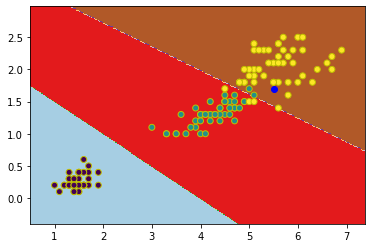

In [93]:
x0_min, x0_max = min(x[:,0]) - 0.5, max(x[:,0]) + 0.5 
x1_min, x1_max = min(x[:,1]) - 0.5, max(x[:,1]) + 0.5 
xx, yy = np.meshgrid(np.arange(x0_min, x0_max,0.02),np.arange(x1_min, x1_max,0.02))
z = svm_clf.predict(np.c_[xx.ravel(),yy.ravel()])
Z = z.reshape((xx.shape))
plt.contourf(xx,yy,Z,cmap = plt.cm.Paired)
#c = y means that, divides data by color regarding to y column
plt.scatter(iris['data'][:,2],iris['data'][:,3],edgecolors= 'y', c = y)
x_new = np.array([[5.5,1.7]])
plt.scatter(x_new[0,0],x_new[0,1], color = 'b')

# Nonlinear SVM Classification

In [1]:
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [2]:
moons = make_moons(n_samples = 100,noise = 0.15)
x = moons[0]
y = moons[1]

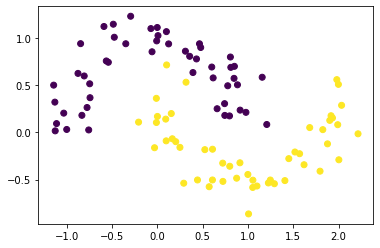

In [5]:
plt.scatter(moons[0][:,0],moons[0][:,1],c =y )

In [115]:
ploynomail_clf = Pipeline([('scaler',StandardScaler()),('linearSVC',PolynomialFeatures(degree = 3)),
                               ('linear_svc',LinearSVC(C =1))])
ploynomail_clf.fit(x,y)


Pipeline(steps=[('scaler', StandardScaler()),
                ('linearSVC', PolynomialFeatures(degree=3)),
                ('linear_svc', LinearSVC(C=1))])

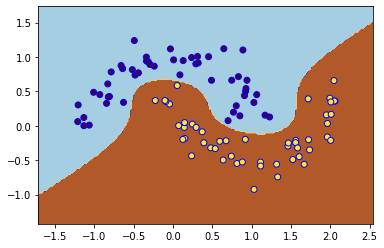

In [117]:
x0_min, x0_max = min(x[:,0]) - 0.5, max(x[:,0]) + 0.5 
x1_min, x1_max = min(x[:,1]) - 0.5, max(x[:,1]) + 0.5 
xx, yy = np.meshgrid(np.arange(x0_min, x0_max,0.02),np.arange(x1_min, x1_max,0.02))
z = ploynomail_clf.predict(np.c_[xx.ravel(),yy.ravel()])
Z = z.reshape((xx.shape))
plt.contourf(xx,yy,Z,cmap = plt.cm.Paired)
#c = y means that, divides data by color regarding to y column
plt.scatter(x[:,0], x[:,1], edgecolors= 'b', c = y)


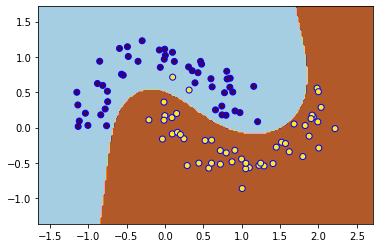

In [16]:
ploynomail_smv_clf = Pipeline([('scaler',StandardScaler()),('poly_svc',SVC(kernel = 'poly',degree = 3, C =1, coef0 = 50))])
#control overfiting and underfitting by coef0 and degree
ploynomail_smv_clf.fit(x,y)


x0_min, x0_max = min(x[:,0]) - 0.5, max(x[:,0]) + 0.5 
x1_min, x1_max = min(x[:,1]) - 0.5, max(x[:,1]) + 0.5 
xx, yy = np.meshgrid(np.arange(x0_min, x0_max,0.02),np.arange(x1_min, x1_max,0.02))
z = ploynomail_smv_clf.predict(np.c_[xx.ravel(),yy.ravel()])
Z = z.reshape((xx.shape))
plt.contourf(xx,yy,Z,cmap = plt.cm.Paired)
#c = y means that, divides data by color regarding to y column
plt.scatter(x[:,0], x[:,1], edgecolors= 'b', c = y)


# Gussian RBF Kernel

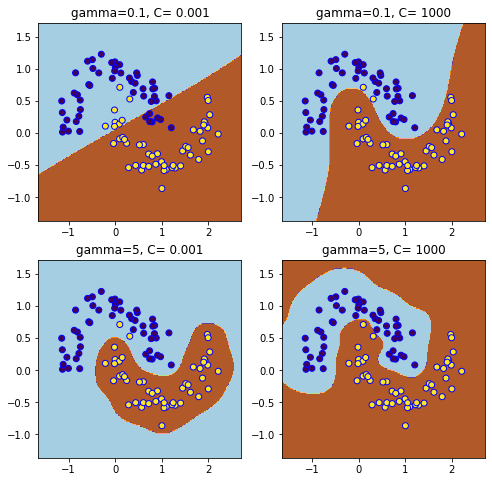

In [31]:
plt.figure(figsize=(8,8))
x0_min, x0_max = min(x[:,0]) - 0.5, max(x[:,0]) + 0.5 
x1_min, x1_max = min(x[:,1]) - 0.5, max(x[:,1]) + 0.5 
xx, yy = np.meshgrid(np.arange(x0_min, x0_max,0.02),np.arange(x1_min, x1_max,0.02))
gamma = [0.1,5]
C = [0.001,1000]
i = 0
for g in gamma:
    for c in C:
        i += 1
        plt.subplot(2,2,i)
        #print (c,g)
        rbf_kernel_svm_clf = Pipeline([('scaler',StandardScaler()),('svm_rbf', SVC(kernel = 'rbf', gamma = g, C = c))])
        rbf_kernel_svm_clf.fit(x,y)
        z = rbf_kernel_svm_clf.predict(np.c_[xx.ravel(),yy.ravel()])
        Z = z.reshape((xx.shape))
        plt.contourf(xx,yy,Z,cmap = plt.cm.Paired)
        #c = y means that, divides data by color regarding to y column
        plt.scatter(x[:,0], x[:,1], edgecolors= 'b', c = y)
        plt.title('gamma={}, C= {}'.format(g,c))
